In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [2]:
audio_path = '../Data/Audios/'
label_path = '../Data/Labels/'
var_path = '../Data/Variables/'

audios = var_path + 'batch_5_audios.txt'
labels = var_path + 'batch_5_labels.txt'

color_ann = {'N': 'white', 
             'C': 'peru', 'C#': 'springgreen', 'D': 'coral', 
             'D#': 'olive', 'Dm': 'teal', 'Em': 'pink',
             'F': 'greenyellow', 'F#': 'purple','G': 'steelblue', 'G#':'indigo', 
             'Am':'orange', 'A#':'saddlwbrown', 'A#m':'lightcoral'}

song_selected = [0, 1, 2, 3, 4, 5, 6]

In [3]:
audio_list = get_files(audios, audio_path)
label_list = get_files(labels, label_path)
name_list = get_name_list(audio_list)

song_dict = get_song_dict(name_list, audio_list, label_list)
song_dict


{0: ['Best Part',
  'r',
  '../Data/Audios/Daniel Caesar & H.E.R. - Best Part.wav',
  '../Data/Labels/best_part_labels.csv'],
 1: ['Somewhere over the Rainbow',
  'b',
  '../Data/Audios/Israel IZ Kamakawiwo ole - Somewhere over the Rainbow.wav',
  '../Data/Labels/somewhere_over_the_rainbow_labels.csv'],
 2: ['Stitches',
  'c',
  '../Data/Audios/Shawn Mendes - Stitches.wav',
  '../Data/Labels/stitches_labels.csv'],
 3: ['Attention',
  'g',
  '../Data/Audios/Charlie Puth - Attention.wav',
  '../Data/Labels/attention_labels.csv'],
 4: ['When I Was Your Man',
  'm',
  '../Data/Audios/Bruno Mars - When I Was Your Man.wav',
  '../Data/Labels/when_i_was_your_man_labels.csv'],
 5: ['Sunday Morning',
  'y',
  '../Data/Audios/Maroon 5 - Sunday Morning.wav',
  '../Data/Labels/sunday_morning_labels.csv'],
 6: ['The Scientist',
  'k',
  '../Data/Audios/Coldplay - The Scientist.wav',
  '../Data/Labels/the_scientist_labels.csv']}

In [4]:
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR')

===== Computation of STFT-based chromagrams =====
Processing:  Best Part
Processing:  Somewhere over the Rainbow
Processing:  Stitches
Processing:  Attention
Processing:  When I Was Your Man
Processing:  Sunday Morning
Processing:  The Scientist
===== Computation of CQT-based chromagrams =====
Processing:  Best Part
Processing:  Somewhere over the Rainbow
Processing:  Stitches
Processing:  Attention
Processing:  When I Was Your Man
Processing:  Sunday Morning
Processing:  The Scientist
===== Computation of IIR-based chromagrams =====
Processing:  Best Part
Processing:  Somewhere over the Rainbow
Processing:  Stitches
Processing:  Attention
Processing:  When I Was Your Man
Processing:  Sunday Morning
Processing:  The Scientist


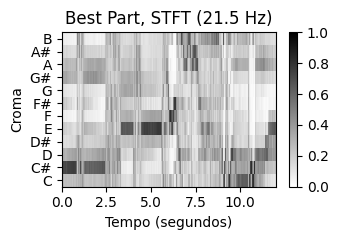

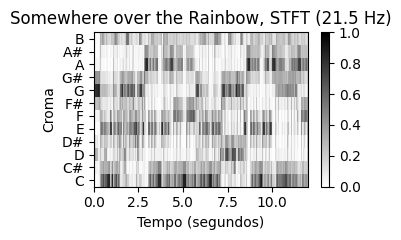

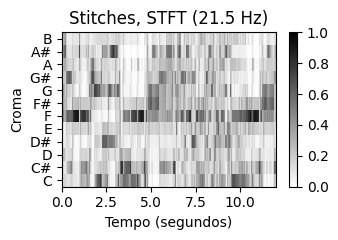

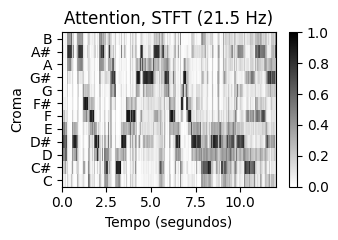

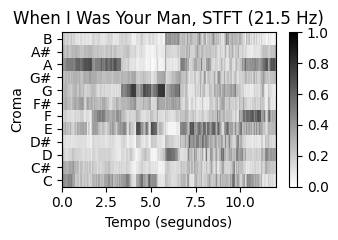

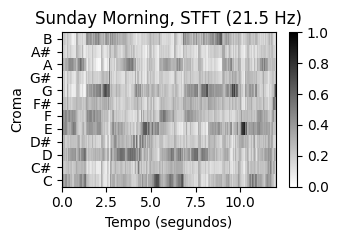

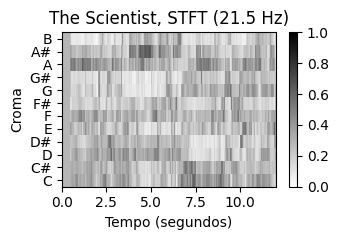

In [5]:
# STFT
get_chromagram(song_selected, song_dict, Fs_X_dict_STFT, X_dict_STFT)

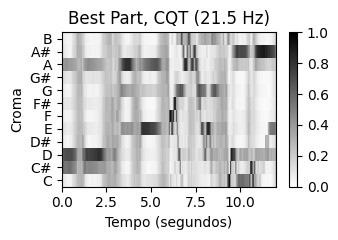

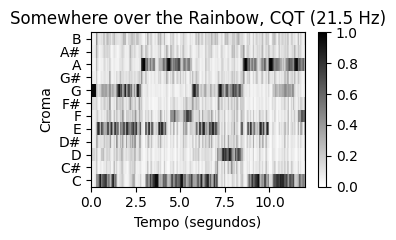

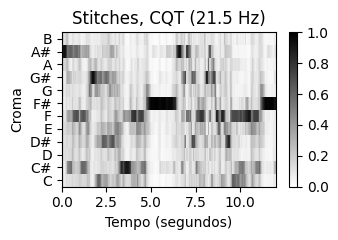

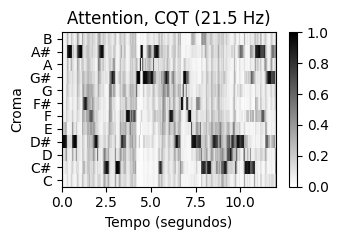

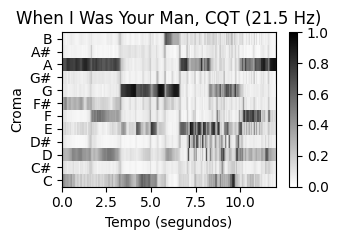

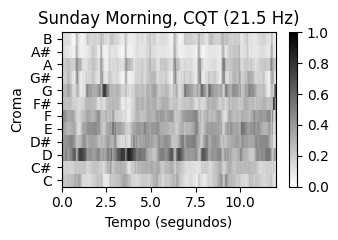

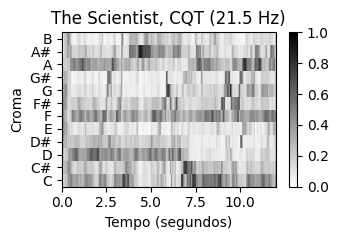

In [10]:
# CQT
chroma_type = 1
get_chromagram(song_selected, song_dict, Fs_X_dict_CQT, X_dict_CQT, chroma_type=chroma_type)

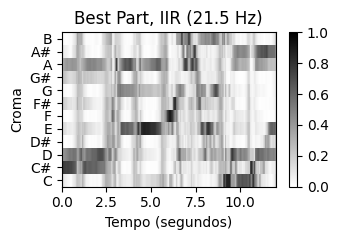

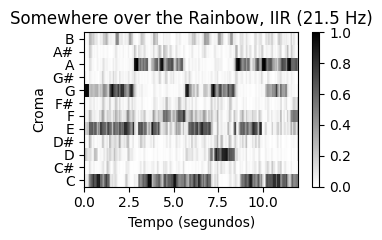

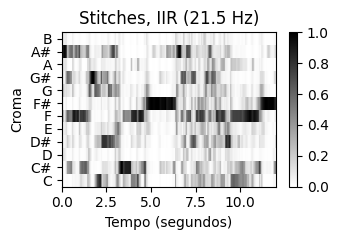

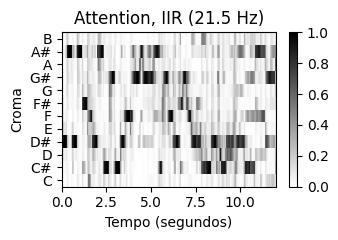

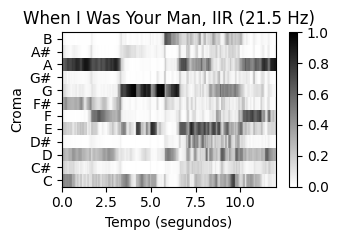

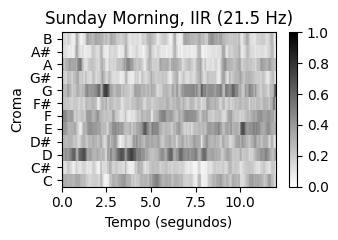

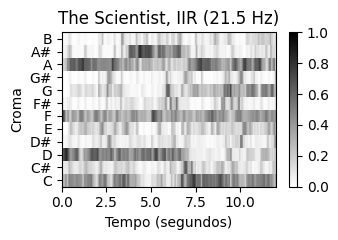

In [11]:
# IIR
chroma_type = 2
get_chromagram(song_selected, song_dict, Fs_X_dict_IIR, X_dict_IIR, chroma_type=chroma_type)

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


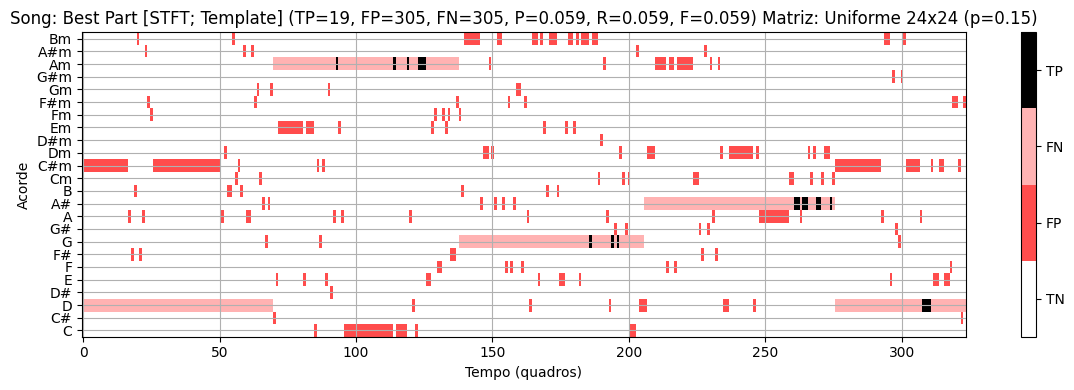

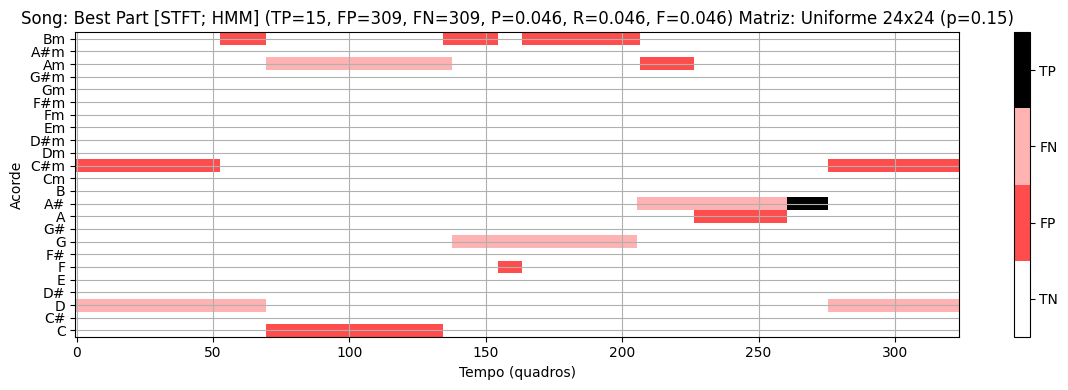

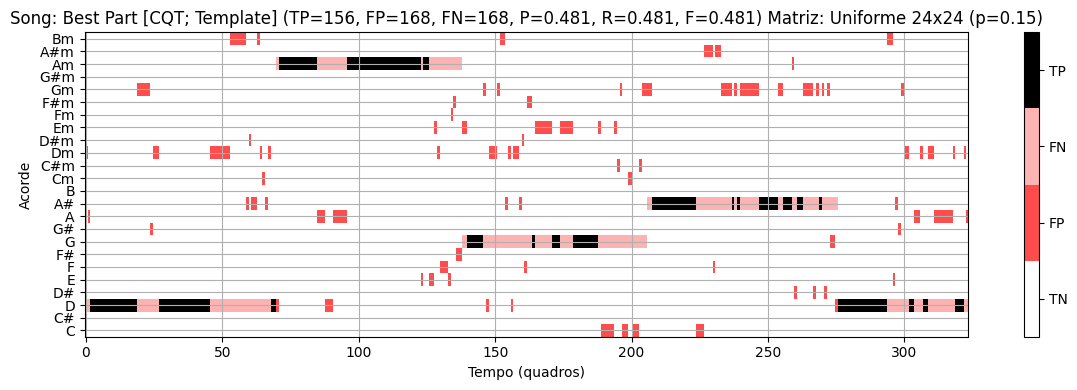

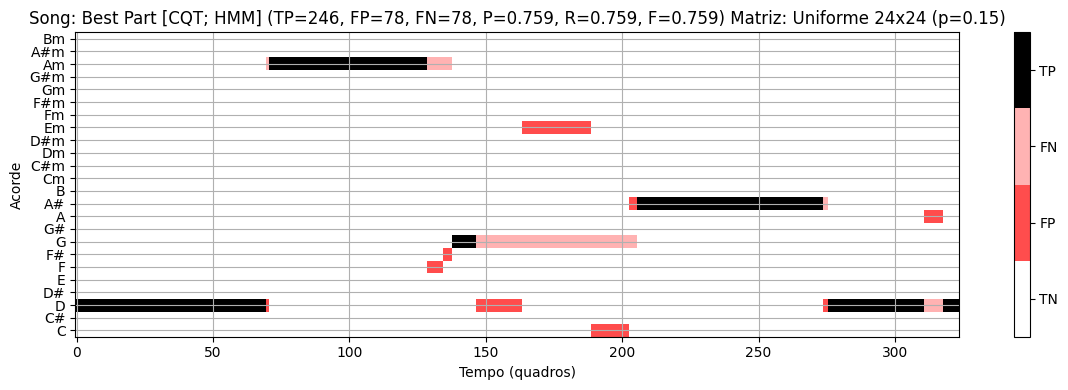

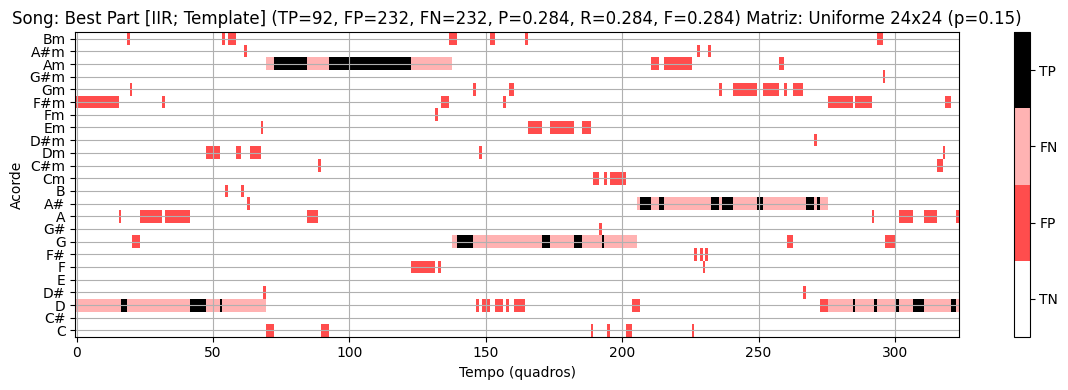

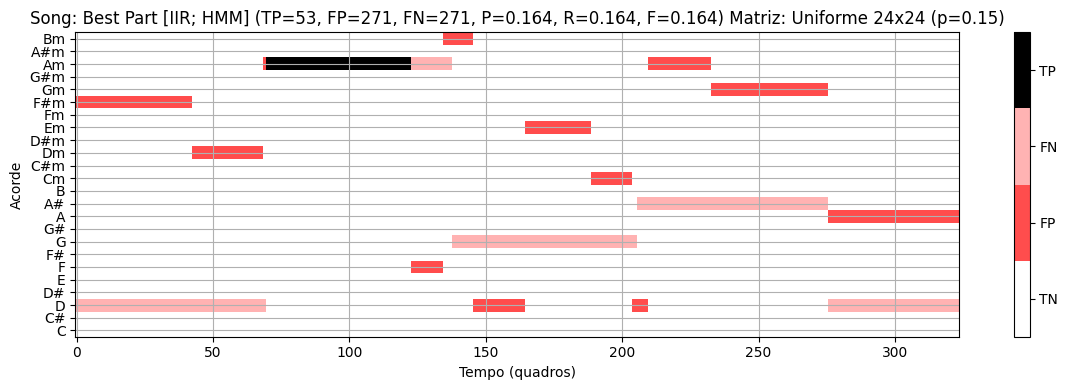

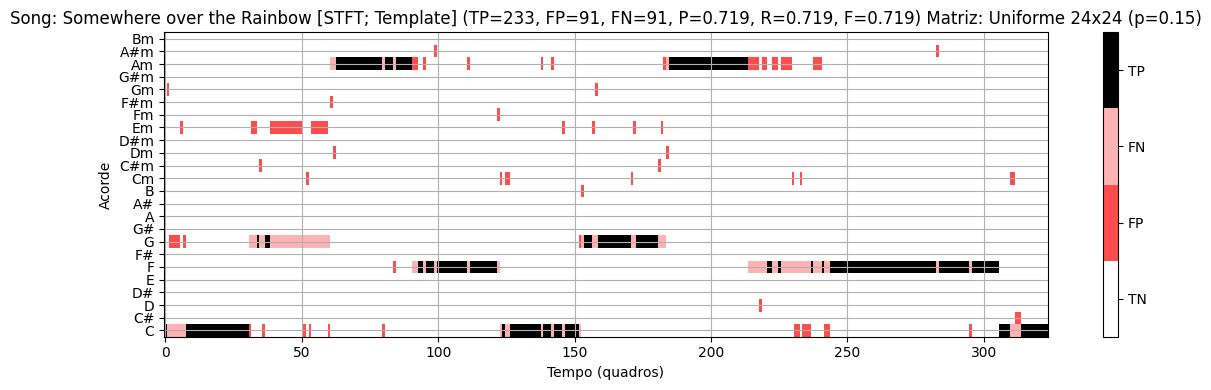

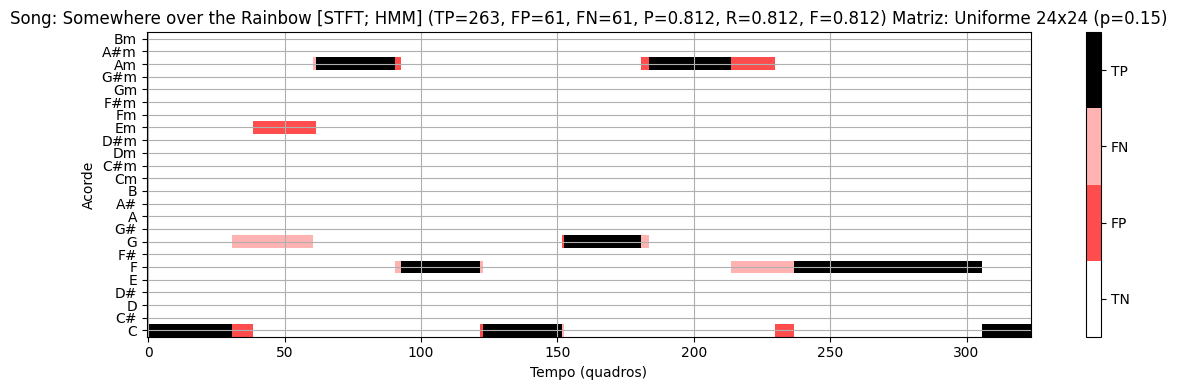

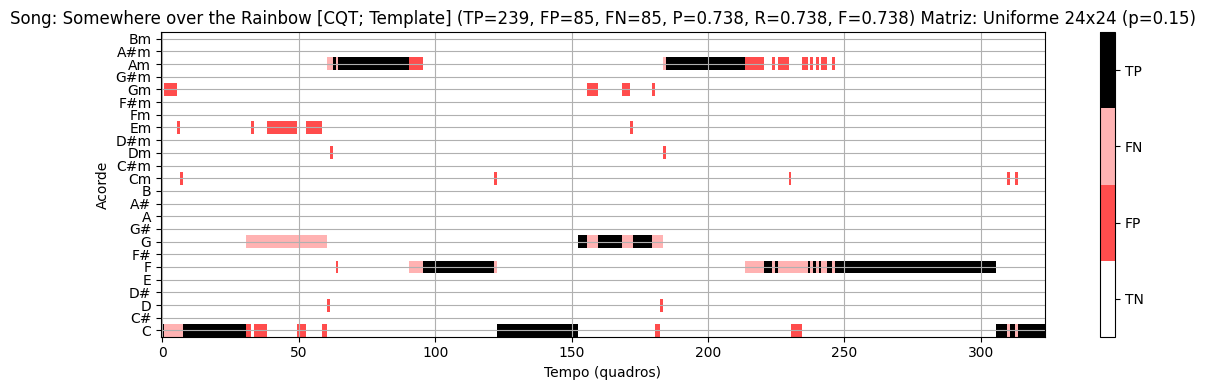

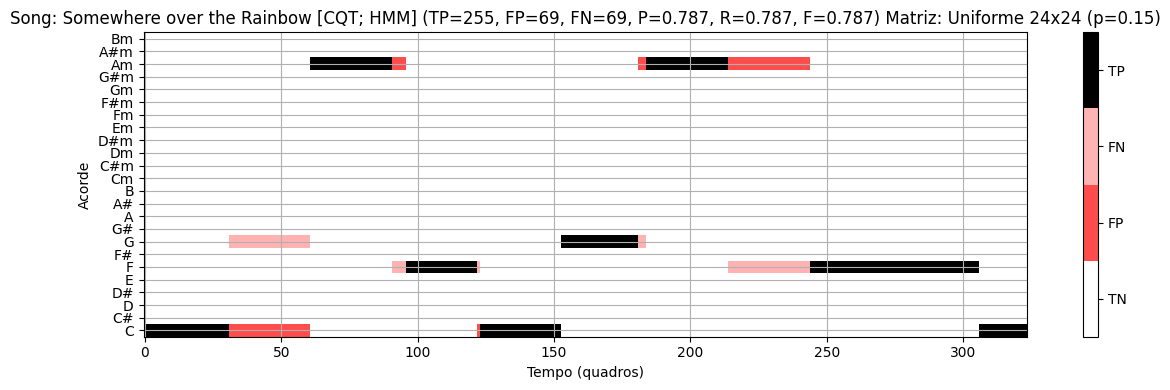

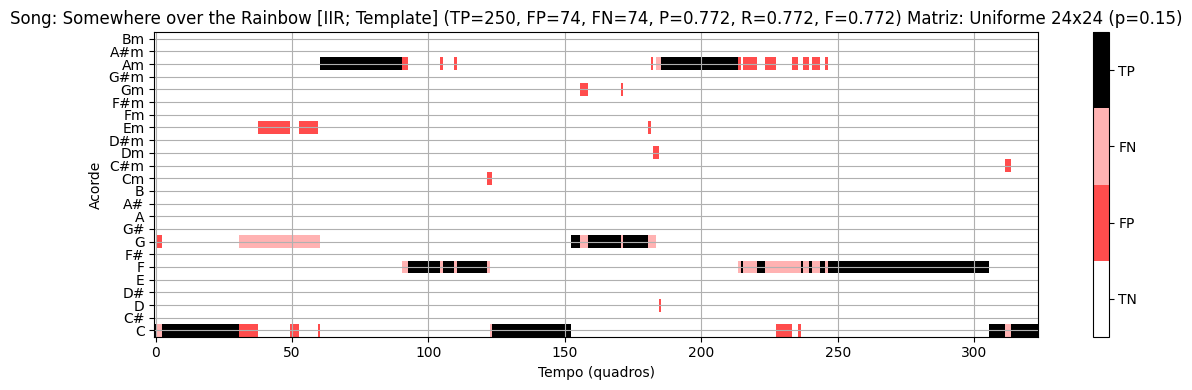

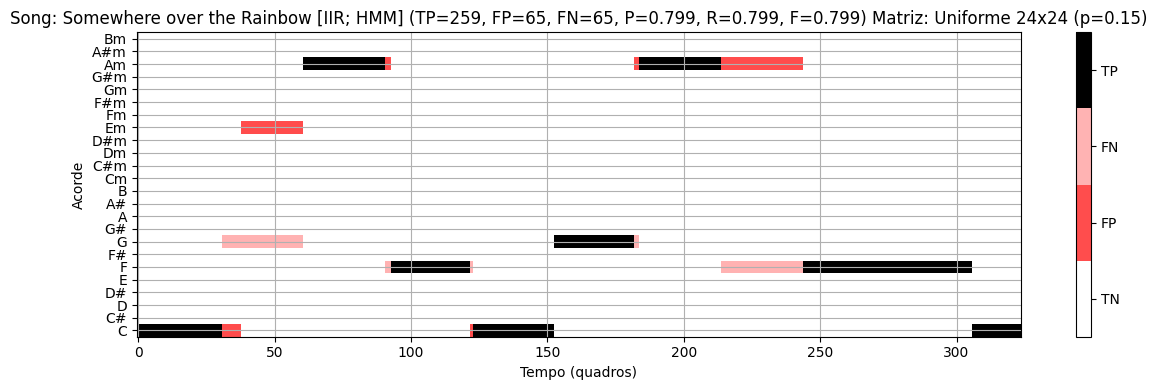

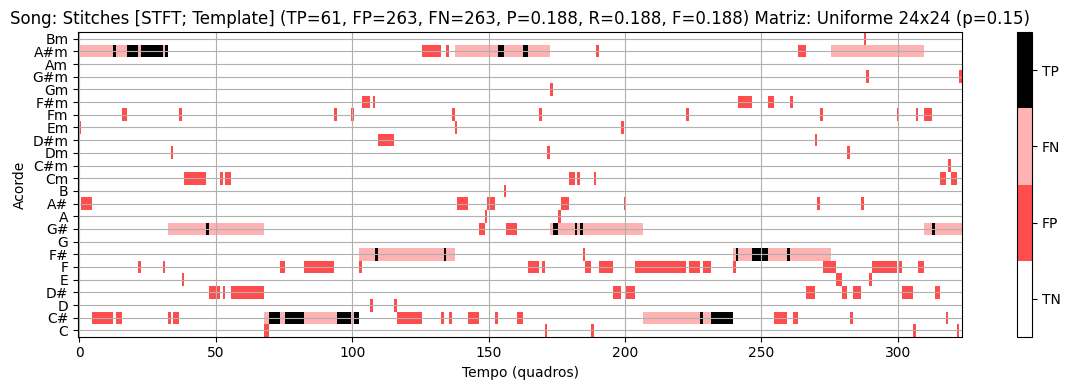

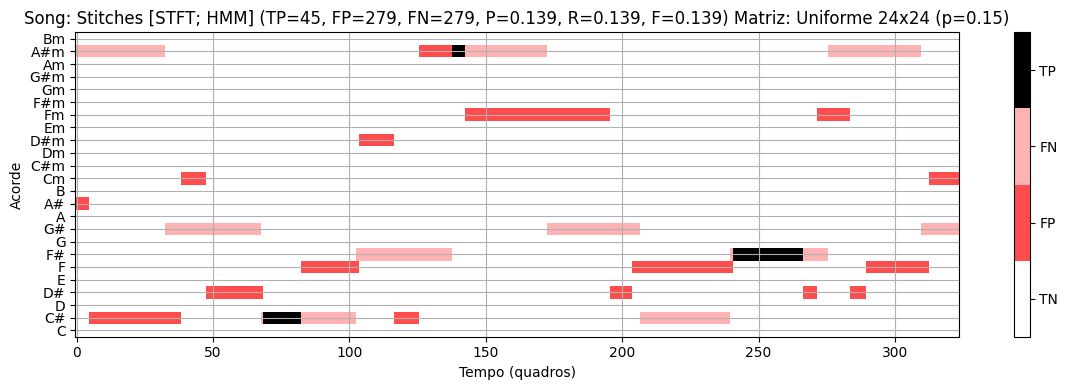

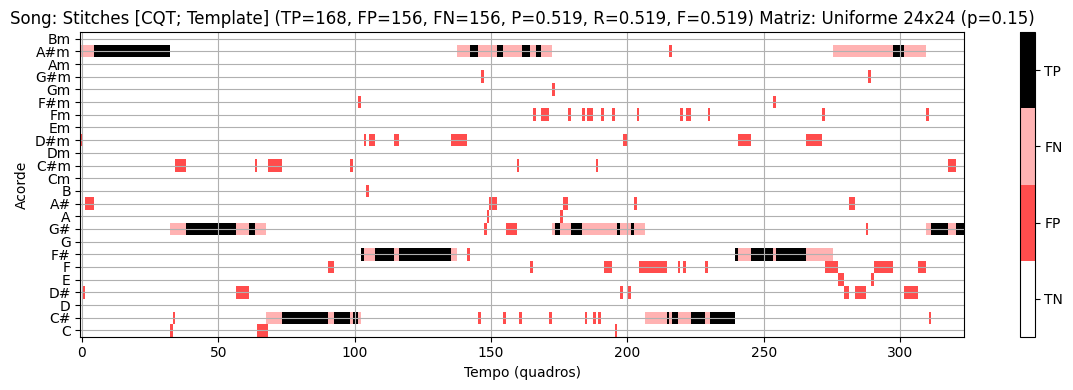

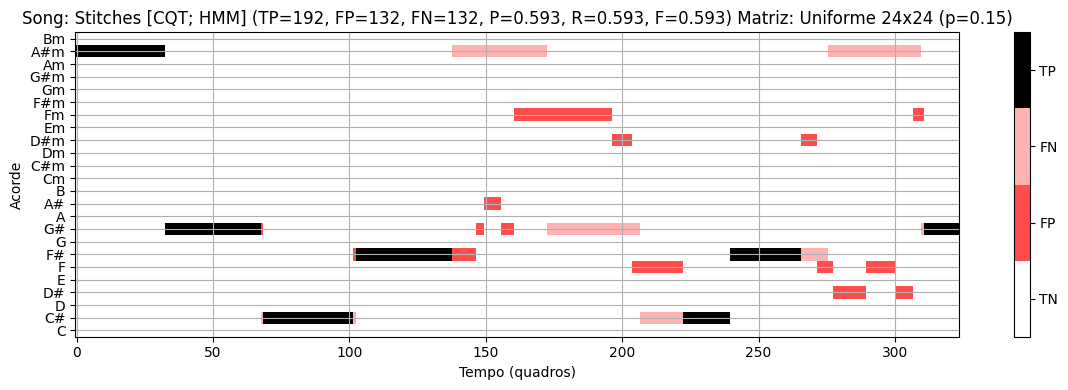

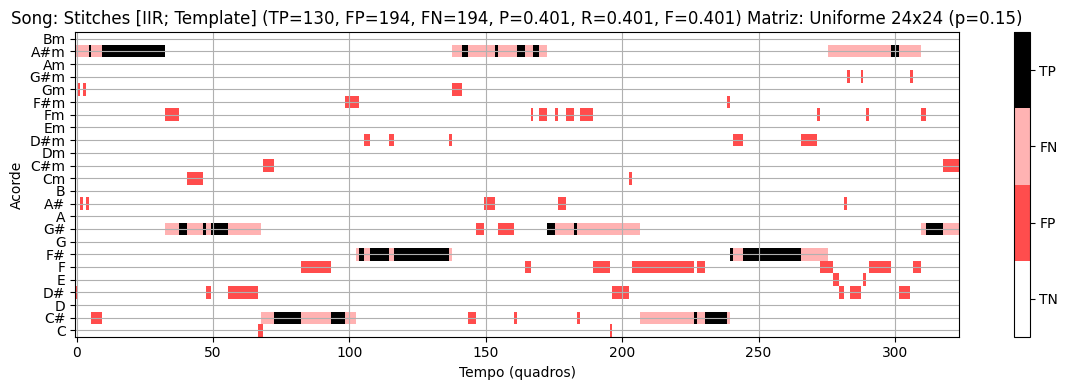

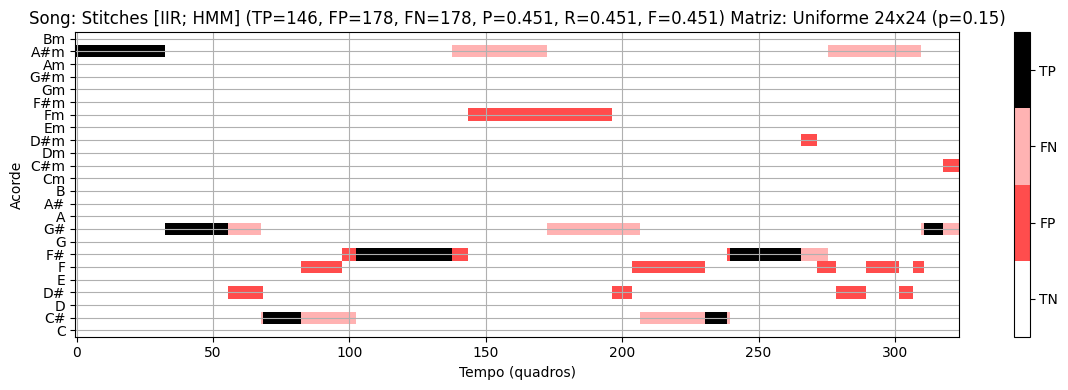

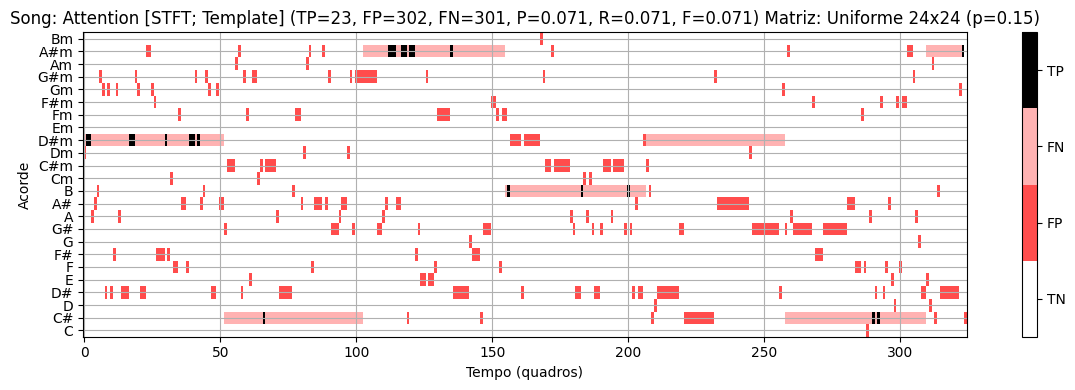

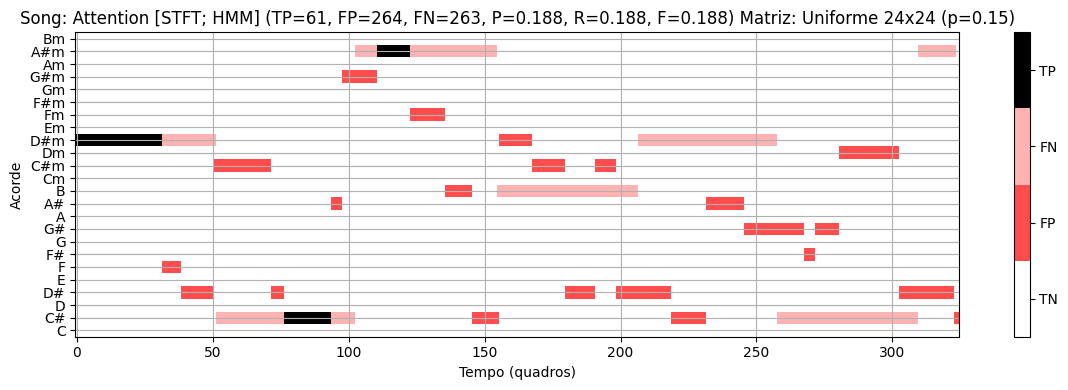

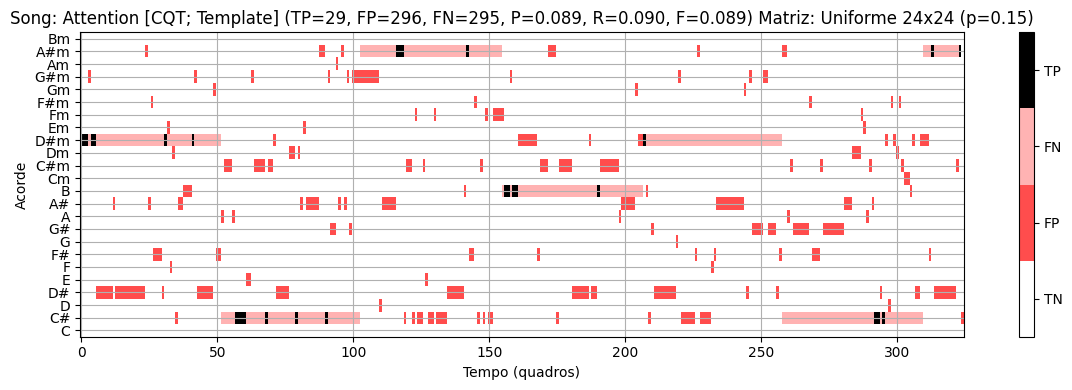

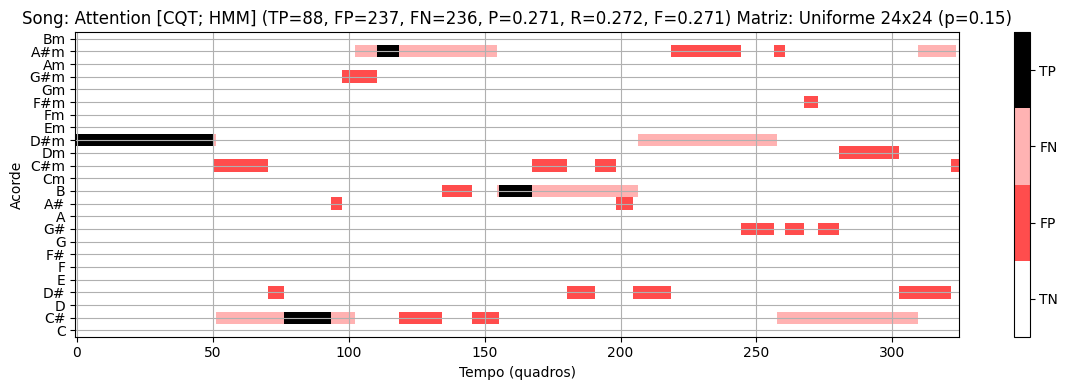

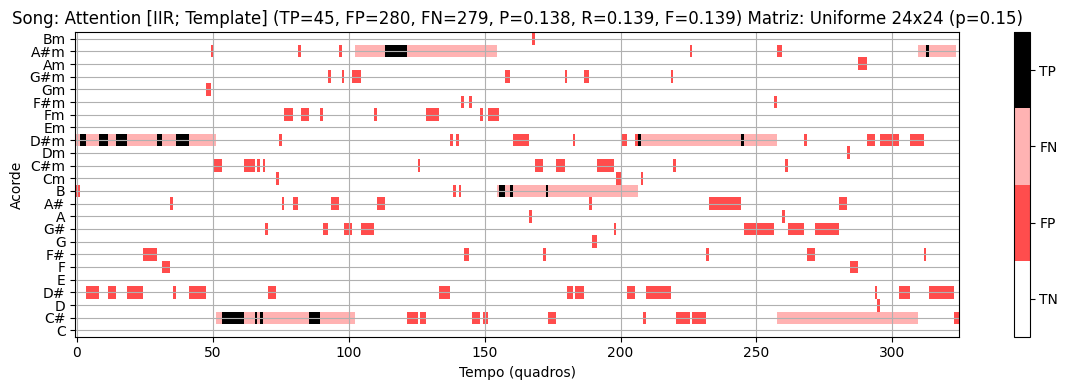

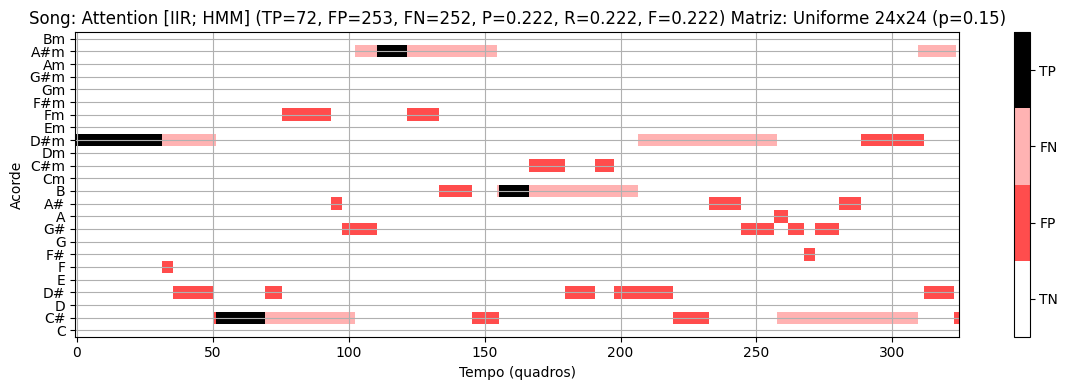

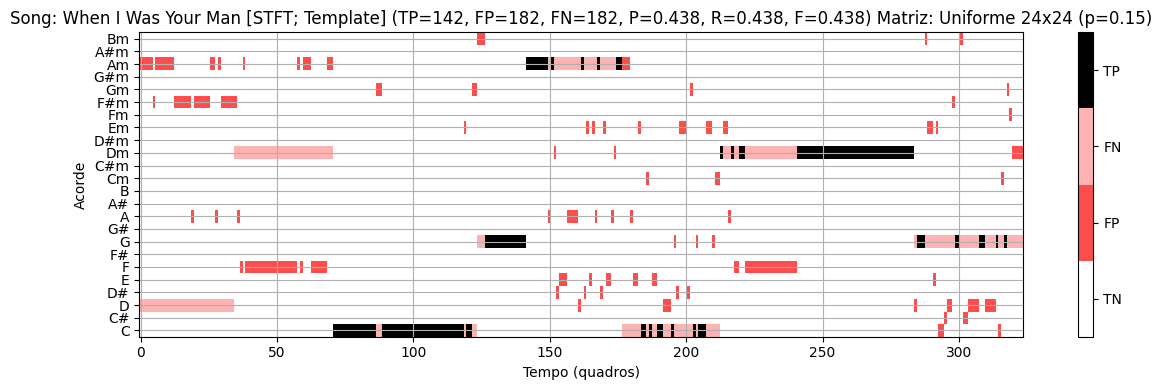

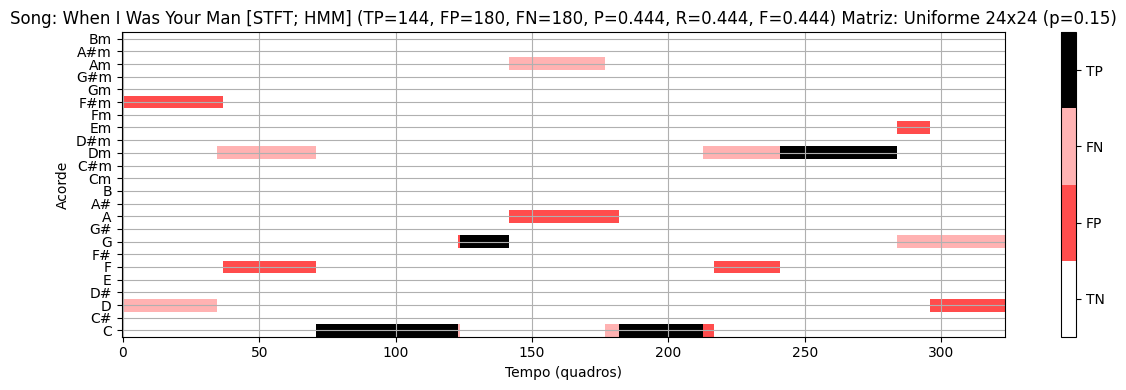

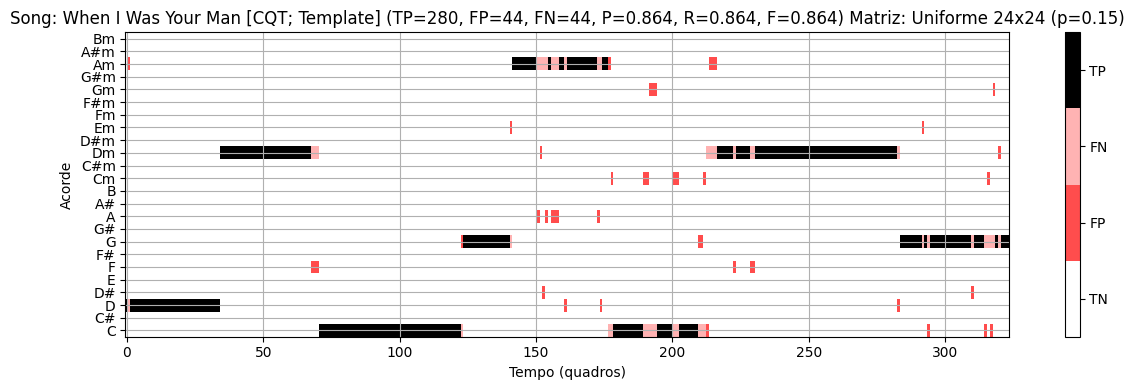

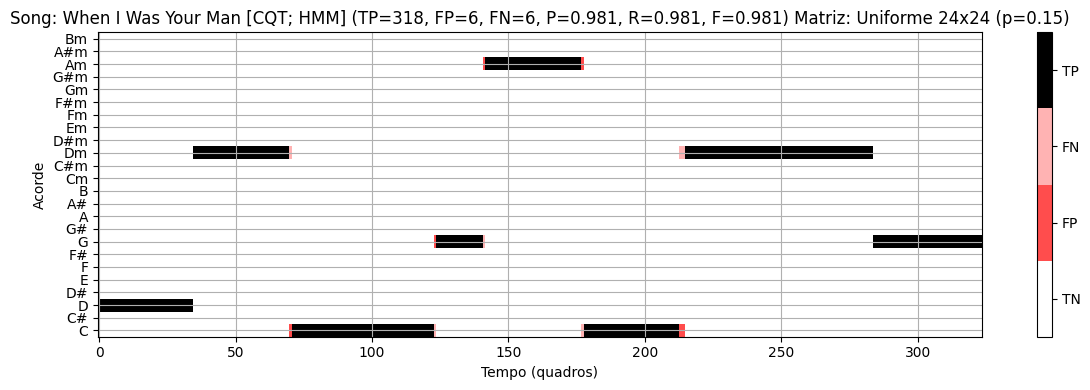

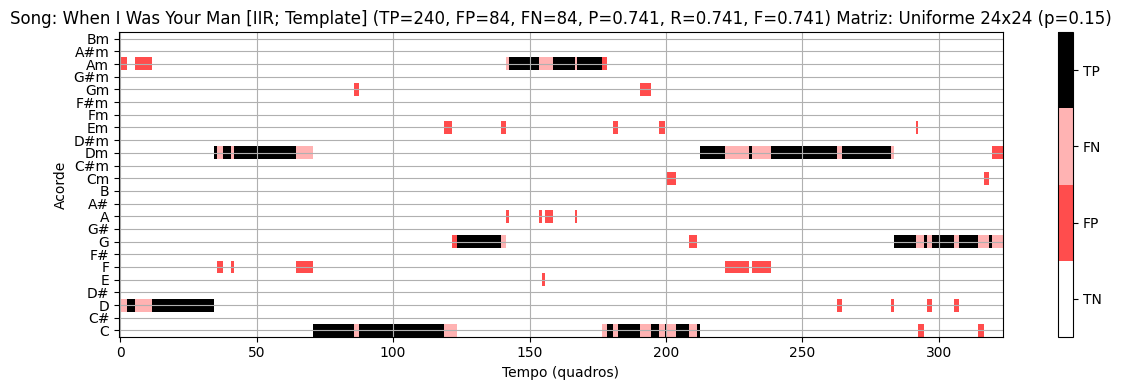

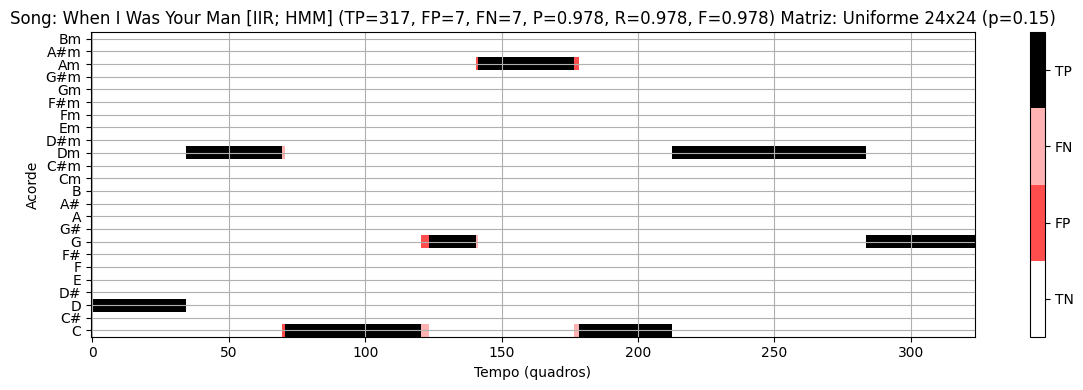

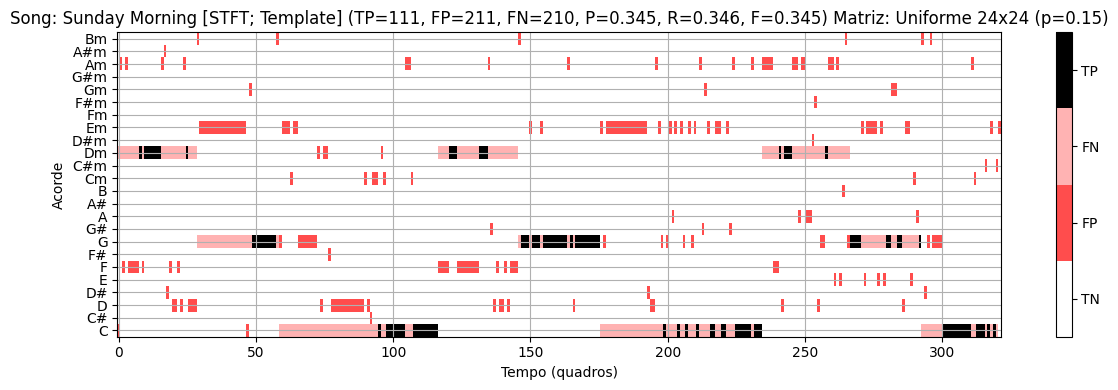

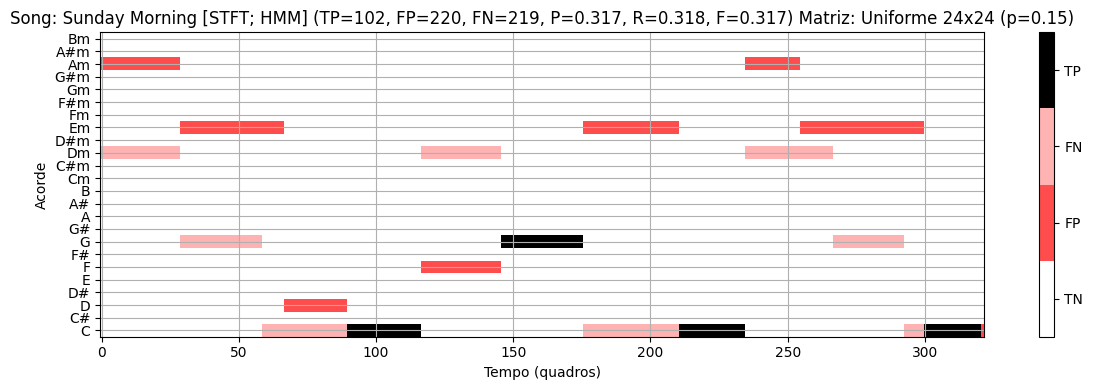

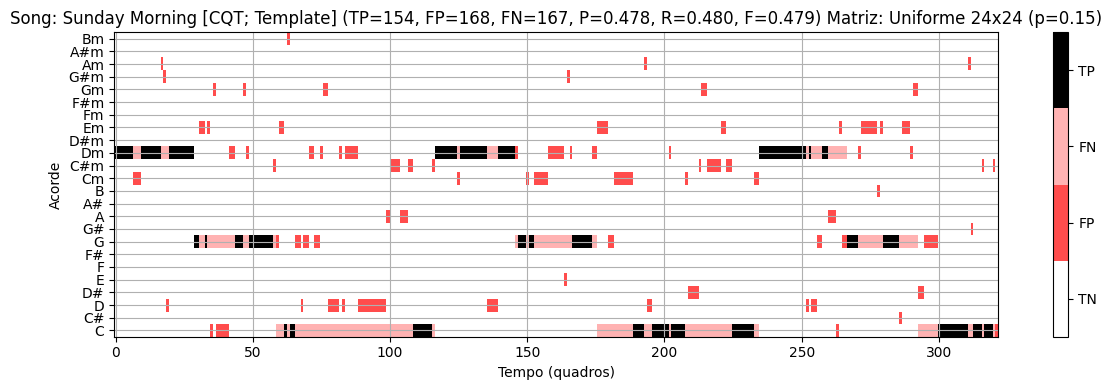

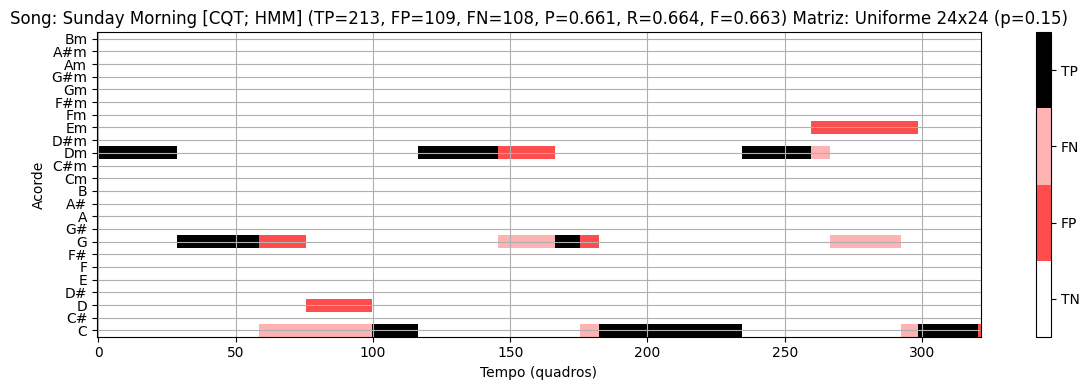

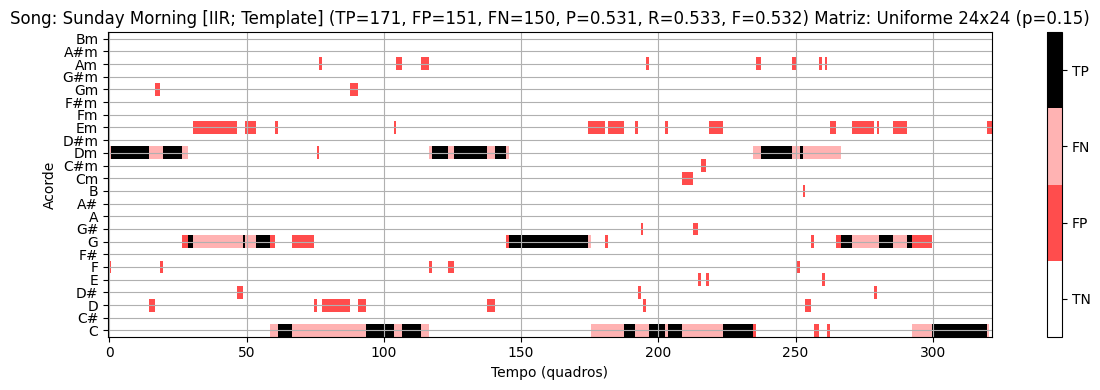

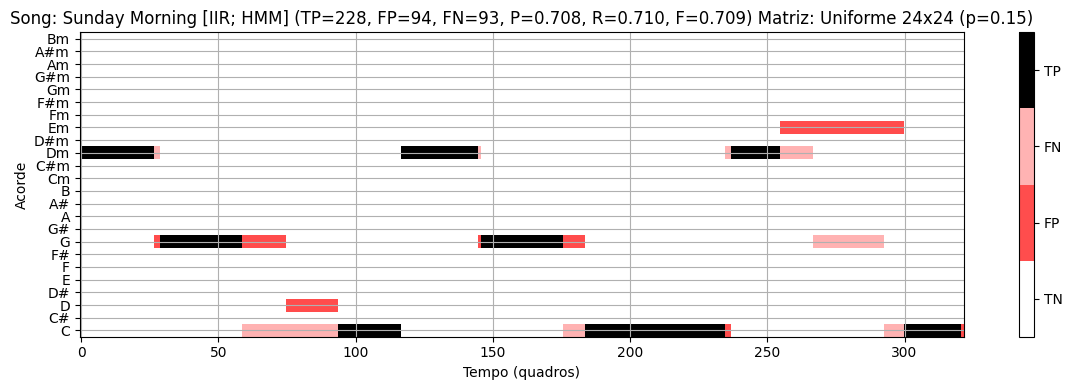

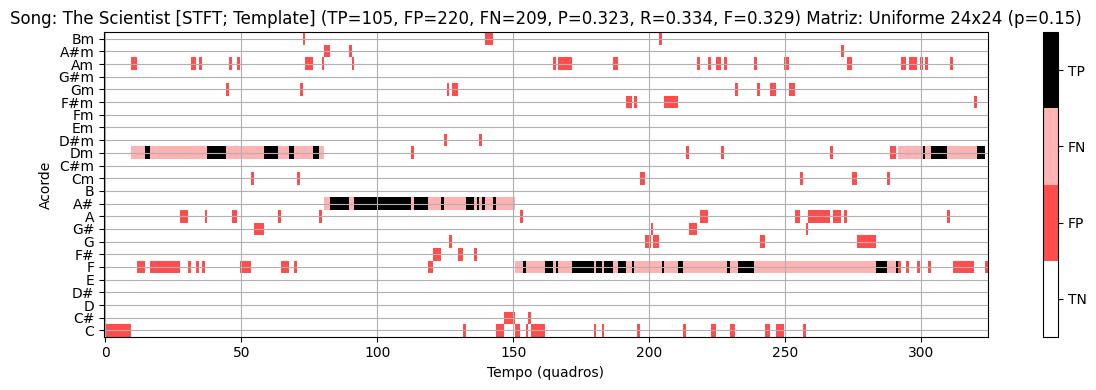

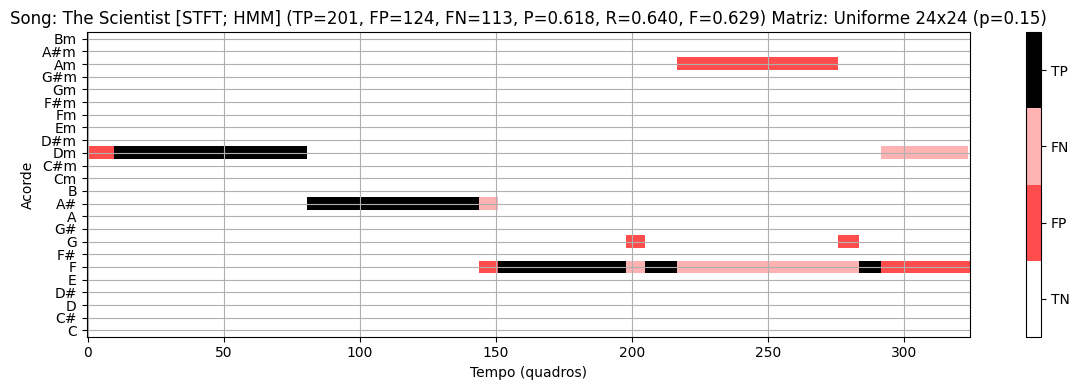

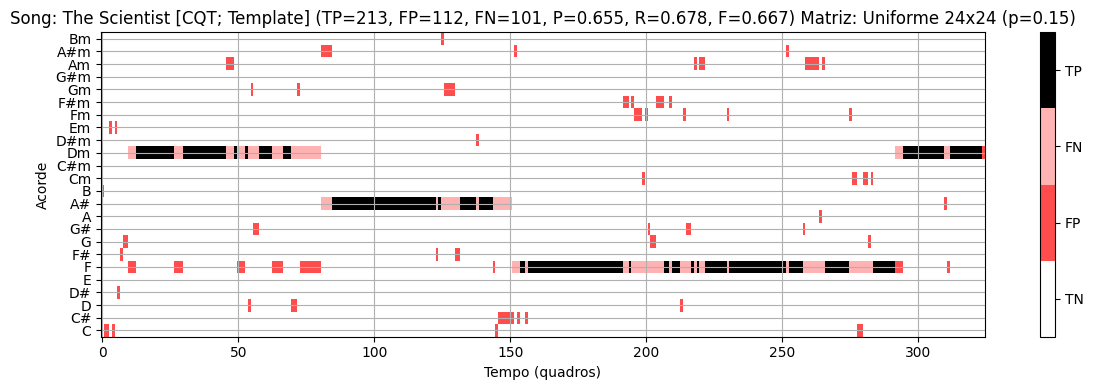

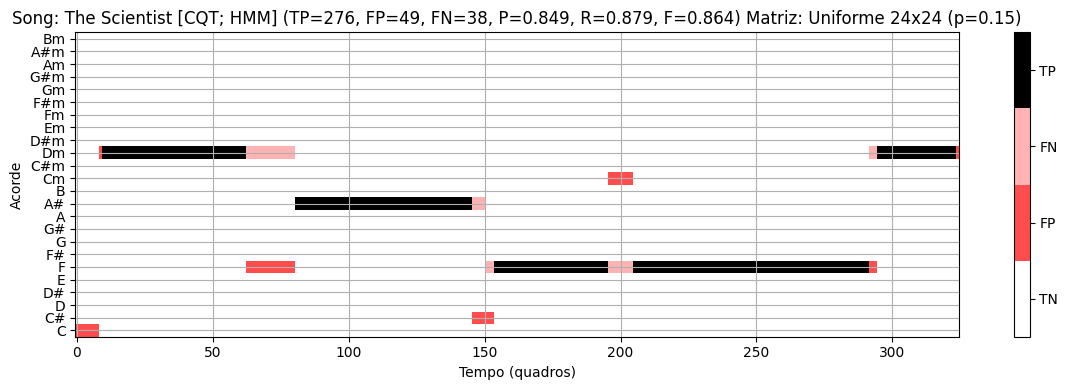

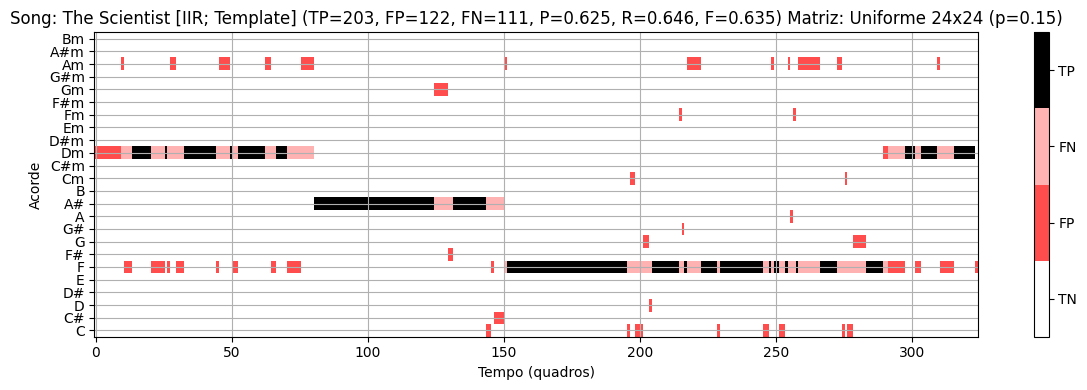

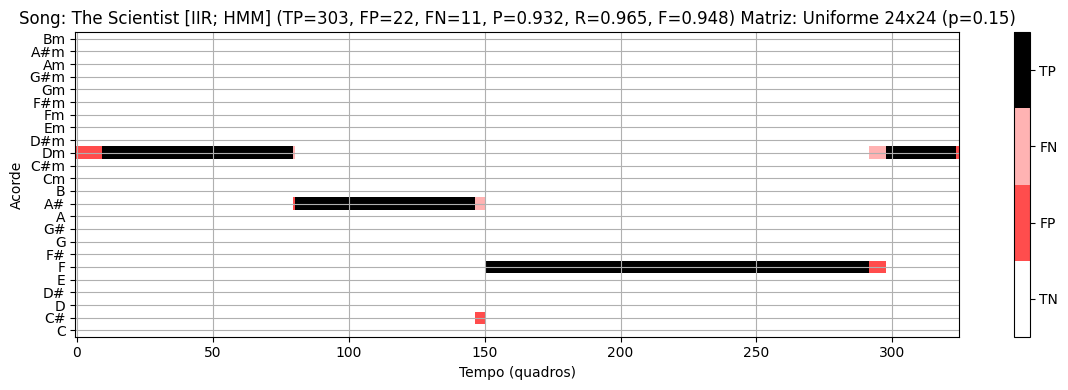

In [8]:
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)  